In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
drinks_data=pd.read_csv("drinks.csv.xls")

In [10]:
drinks_data.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [11]:
drinks_data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [12]:
#the lines below i am checking which country is good at consuming alcohol
drinks_data[["country","total_litres_of_pure_alcohol"]].max()

country                         Zimbabwe
total_litres_of_pure_alcohol        14.4
dtype: object

In [13]:
drinks_data["total_litres_of_pure_alcohol"].max()

14.4

In [14]:
drinks_data[drinks_data["country"]=="Zimbabwe"].sum()

country                         Zimbabwe
beer_servings                         64
spirit_servings                       18
wine_servings                          4
total_litres_of_pure_alcohol         4.7
continent                             AF
dtype: object

In [15]:
drinks_data.groupby('country')[["total_litres_of_pure_alcohol","country"]].sum().max()

total_litres_of_pure_alcohol    14.4
dtype: float64

### As of a bove seems Zimbabwe is a good market for Alcoholic drinks

## Find out total litres of alcohol per combination of servings

In [16]:
#getting only relevant data
y=drinks_data.total_litres_of_pure_alcohol
X=drinks_data[["beer_servings","spirit_servings","wine_servings"]]

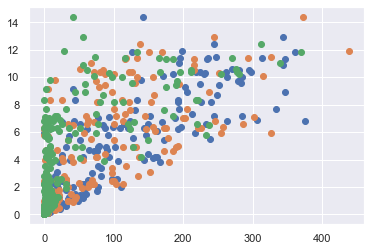

In [20]:
plt.scatter(X["beer_servings"],y)
plt.scatter(X["spirit_servings"],y)
plt.scatter(X["wine_servings"],y)
plt.show()

In [21]:
#checking nulls
X.isnull().sum()

beer_servings      0
spirit_servings    0
wine_servings      0
dtype: int64

In [22]:
y.isnull().sum()

0

In [23]:
#spliting data into : training and testing data
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=50)

In [24]:
#training to find a common linear regression formula/model 
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [25]:
#find coeficients , from results beer servings has strong association with total of pure alcohol
linreg.coef_

array([0.01830291, 0.01555814, 0.01600524])

In [26]:
#intercept
linreg.intercept_

0.7224498487088455

In [27]:
#checking how well is the model
score=linreg.score(Xtest, ytest)
score

0.8361642089504085

In [29]:
#we can start to use our model
#y_pred = linreg.predict(new_X)